In [1]:
import sys; sys.path.insert(0, "../"); from utils import *
from models import VAE, vae_loss, AutoEncoder, ae_loss
from tqdm import trange

%matplotlib inline
import matplotlib.pyplot as plt

You can use npar for np.array


In [2]:
X = torch.rand(100, 2)

In [3]:
ae = AutoEncoder()

In [4]:
opt = torch.optim.Adam(ae.parameters(), lr=1e-3)

100%|██████████| 10000/10000 [00:03<00:00, 2550.79it/s]


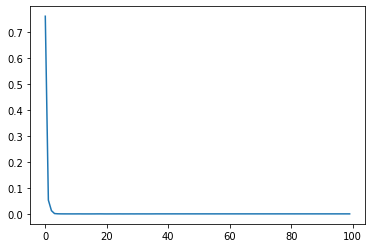

In [5]:
hist = []
for i in trange(10000):
    opt.zero_grad()
    recon_X = ae(X)
    loss = ae_loss(recon_X, X, include_l1=0.1)
    loss.backward()
    opt.step()
    if i%100==0: hist.append(loss.item())
plt.plot(hist)

In [6]:
ae.eval()
recon_X = ae(X)

In [7]:
# vae_loss(recon_X, X, mu, log_var)
F.mse_loss(recon_X, X)

tensor(6.7855e-06, grad_fn=<MseLossBackward>)

In [8]:
X

tensor([[0.0969, 0.8181],
        [0.2032, 0.0961],
        [0.0975, 0.5487],
        [0.5860, 0.1601],
        [0.0199, 0.1323],
        [0.8814, 0.0635],
        [0.2881, 0.6330],
        [0.7030, 0.6796],
        [0.7991, 0.1272],
        [0.2703, 0.8301],
        [0.2081, 0.8857],
        [0.2625, 0.3337],
        [0.1852, 0.5980],
        [0.5238, 0.1160],
        [0.3979, 0.7427],
        [0.9341, 0.2369],
        [0.2455, 0.2878],
        [0.9901, 0.3389],
        [0.5616, 0.0200],
        [0.0339, 0.9449],
        [0.9659, 0.5180],
        [0.3574, 0.2320],
        [0.4277, 0.7144],
        [0.3243, 0.5074],
        [0.9119, 0.7334],
        [0.3759, 0.5739],
        [0.5075, 0.8819],
        [0.2557, 0.7060],
        [0.0739, 0.5517],
        [0.0903, 0.3743],
        [0.5352, 0.1744],
        [0.7624, 0.5811],
        [0.5688, 0.9726],
        [0.4936, 0.2557],
        [0.9282, 0.4837],
        [0.1133, 0.3390],
        [0.0111, 0.7402],
        [0.6527, 0.7006],
        [0.3

In [9]:
recon_X

tensor([[0.0939, 0.8163],
        [0.2011, 0.0949],
        [0.0948, 0.5469],
        [0.5832, 0.1578],
        [0.0181, 0.1306],
        [0.8778, 0.0622],
        [0.2851, 0.6309],
        [0.6995, 0.6772],
        [0.7961, 0.1247],
        [0.2671, 0.8281],
        [0.2049, 0.8837],
        [0.2598, 0.3317],
        [0.1824, 0.5961],
        [0.5211, 0.1138],
        [0.3947, 0.7405],
        [0.9308, 0.2342],
        [0.2429, 0.2859],
        [0.9865, 0.3373],
        [0.5590, 0.0177],
        [0.0321, 0.9435],
        [0.9622, 0.5152],
        [0.3548, 0.2300],
        [0.4244, 0.7122],
        [0.3214, 0.5053],
        [0.9080, 0.7307],
        [0.3729, 0.5718],
        [0.5040, 0.8796],
        [0.2526, 0.7041],
        [0.0713, 0.5500],
        [0.0878, 0.3725],
        [0.5325, 0.1721],
        [0.7589, 0.5785],
        [0.5641, 0.9691],
        [0.4908, 0.2535],
        [0.9246, 0.4810],
        [0.1108, 0.3372],
        [0.0083, 0.7385],
        [0.6492, 0.6981],
        [0.3